In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D_in, H, D_out = 64, 1000, 100, 10
loss_list = []

x = np.random.randn(N,D_in)
y = np.random.randn(N,D_out)

w1 = np.random.randn(D_in,H)
w2 = np.random.randn(H,D_out)

learning_rate = 1e-6
for t in range(100):
    h = x.dot(w1)
    h_relu = np.maximum(0,h)
    y_pred = h_relu.dot(w2)
    
    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t,loss)
    
    #compute gradient descent
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    #updata parameters
    w1 = w1 - learning_rate * grad_w1
    w2 = w2 - learning_rate * grad_w2
    
y_new = np.maximum(x.dot(w1),0).dot(w2)

0 29043608.379941236
1 24634880.267319143
2 23720270.36019729
3 22696286.798726726
4 20132195.84034177
5 15775265.90969548
6 11070543.300286576
7 7100372.850050789
8 4396391.888734034
9 2733049.511249011
10 1773660.9619954445
11 1218878.3229801408
12 890794.1630611253
13 686615.1774213533
14 551716.4101044817
15 456574.8962439172
16 385714.14693016466
17 330571.0891680847
18 286263.99954241235
19 249803.02559740224
20 219248.8894999966
21 193322.89448386547
22 171127.1148450681
23 151983.68534638203
24 135391.09383443207
25 120945.07651587354
26 108316.01883870356
27 97258.41946764778
28 87527.79825727342
29 78937.8441597458
30 71334.2860584883
31 64591.06215513646
32 58593.66169504552
33 53243.998700014796
34 48460.00199847663
35 44176.21197117661
36 40331.10346679945
37 36873.67108636833
38 33759.93048345227
39 30949.156127787894
40 28407.153367197832
41 26106.281331233342
42 24020.874548818138
43 22123.996545308
44 20397.981576985843
45 18825.798060788882
46 17391.066919374734
47 16

In [16]:
loss_list

[38838440.28732778,
 34936307.16033627,
 32847971.286284477,
 27487410.217095166,
 19284293.11995752,
 11407646.748082507,
 6264729.092098558,
 3515293.5347439814,
 2173640.07283345,
 1495356.942192391,
 1120354.8906528933,
 886840.251275133,
 725533.5162598944,
 605335.006874967,
 511328.44440833613,
 435598.1744131644,
 373549.4157800918,
 322053.81428041036,
 279220.87401264335,
 243112.65118199377,
 212503.49048298894,
 186359.40882260265,
 163952.07554184832,
 144660.35790280835,
 127977.92546995096,
 113514.82398024829,
 100925.23762417652,
 89931.28870613185,
 80303.80400641388,
 71853.42329611615,
 64417.24355901107,
 57851.12273550387,
 52041.10049347178,
 46888.609274788396,
 42309.07321090934,
 38230.991818276525,
 34595.200873901624,
 31346.22554311642,
 28437.48471207816,
 25825.965617957496,
 23480.595351464464,
 21371.837090692483,
 19472.057499428716,
 17758.13781184448,
 16210.56892609438,
 14811.186899316956,
 13545.08203768203,
 12396.941561383916,
 11355.61535999434

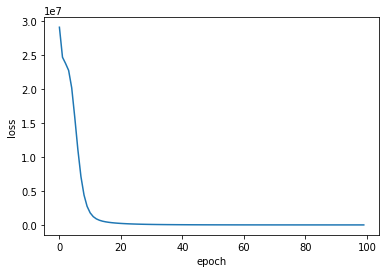

In [3]:
plt_x = [i for i in range(100)]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(plt_x,loss_list)
plt.show()

In [4]:
dtype = torch.float
device = torch.device('cpu')

#set parameters
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in,device=device,dtype=dtype)
y = torch.randn(N, D_out,device=device,dtype=dtype)

w1 = torch.randn(D_in,H,device=device,dtype=dtype)
w2 = torch.randn(H,D_out,device=device,dtype=dtype)

learning_rate = 1e-6
for t in range(100):
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred-y).pow(2).sum().item()
    print(t,loss)
    
    grad_y_pred = 2.0 * (y_pred-y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 28898258.0
1 22154698.0
2 20429248.0
3 20185674.0
4 19497230.0
5 17339594.0
6 13858919.0
7 9960428.0
8 6615940.5
9 4210756.0
10 2673273.25
11 1744431.5
12 1193610.375
13 862104.4375
14 655756.3125
15 520792.71875
16 427526.9375
17 359514.96875
18 307557.28125
19 266377.5625
20 232785.40625
21 204753.0
22 181026.5
23 160711.703125
24 143169.203125
25 127926.046875
26 114615.03125
27 102953.4140625
28 92682.5546875
29 83607.8828125
30 75569.8203125
31 68422.875
32 62046.74609375
33 56358.05859375
34 51267.6796875
35 46701.0625
36 42595.3671875
37 38900.046875
38 35567.8359375
39 32558.4453125
40 29835.326171875
41 27367.603515625
42 25129.04296875
43 23095.720703125
44 21246.666015625
45 19563.234375
46 18027.7109375
47 16625.796875
48 15345.40625
49 14173.91796875
50 13101.20703125
51 12117.94921875
52 11216.0263671875
53 10388.4951171875
54 9628.138671875
55 8928.728515625
56 8284.859375
57 7692.26123046875
58 7146.55859375
59 6642.9580078125
60 6178.6572265625
61 5750.0966796875
62 

In [5]:
#set parameters
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in,device=device,dtype=dtype)
y = torch.randn(N, D_out,device=device,dtype=dtype)

w1 = torch.randn(D_in,H,device=device,dtype=dtype,requires_grad=True)
w2 = torch.randn(H,D_out,device=device,dtype=dtype,requires_grad=True)

learning_rate = 1e-6
for t in range(100):
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred-y).pow(2).sum()
    print(t,loss.item())
    
#     grad_y_pred = 2.0 * (y_pred-y)
#     grad_w2 = h_relu.t().mm(grad_y_pred)
#     grad_h_relu = grad_y_pred.mm(w2.t())
#     grad_h = grad_h_relu.clone()
#     grad_h[h<0] = 0
#     grad_w1 = x.t().mm(grad_h)
    
#     w1 -= learning_rate * grad_w1
#     w2 -= learning_rate * grad_w2
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()
        

0 27000172.0
1 22415876.0
2 22595520.0
3 24150082.0
4 24582524.0
5 21896276.0
6 16605205.0
7 10682241.0
8 6199948.0
9 3455385.5
10 1991745.25
11 1237049.25
12 842787.1875
13 623393.4375
14 490452.6875
15 402208.6875
16 338556.84375
17 289662.75
18 250491.796875
19 218260.59375
20 191242.453125
21 168357.25
22 148809.5625
23 131998.46875
24 117464.953125
25 104835.9765625
26 93816.625
27 84169.4296875
28 75703.71875
29 68240.828125
30 61648.5859375
31 55817.58203125
32 50651.7578125
33 46049.140625
34 41942.7734375
35 38267.50390625
36 34970.9375
37 32007.921875
38 29338.212890625
39 26930.255859375
40 24755.220703125
41 22784.91796875
42 20997.806640625
43 19372.572265625
44 17893.54296875
45 16545.39453125
46 15315.697265625
47 14190.857421875
48 13161.0419921875
49 12217.5361328125
50 11351.361328125
51 10555.40625
52 9823.185546875
53 9148.6005859375
54 8526.828125
55 7952.8330078125
56 7422.43408203125
57 6932.169921875
58 6478.46728515625
59 6058.09521484375
60 5668.49755859375
61

In [40]:
#set parameters
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in,device=device,dtype=dtype)
y = torch.randn(N, D_out,device=device,dtype=dtype)

# w1 = torch.randn(D_in,H,device=device,dtype=dtype,requires_grad=True)
# w2 = torch.randn(H,D_out,device=device,dtype=dtype,requires_grad=True)
model = nn.Sequential(
    nn.Linear(D_in,H),
    nn.ReLU(),
    nn.Linear(H,D_out),
)

learning_rate = 1e-4
loss_fn = nn.MSELoss(reduction='sum')

for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    print(t,loss.item())
#     loss.backward()
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for parameter in model.parameters():
            parameter -= parameter.grad * learning_rate

0 630.1660766601562
1 585.4364624023438
2 546.3655395507812
3 511.8250732421875
4 481.2278137207031
5 453.6160583496094
6 428.4285888671875
7 405.41986083984375
8 384.10662841796875
9 363.9811706542969
10 344.9988708496094
11 327.17132568359375
12 310.3816223144531
13 294.4994201660156
14 279.4294738769531
15 265.11395263671875
16 251.49588012695312
17 238.4514617919922
18 226.01014709472656
19 214.10617065429688
20 202.70449829101562
21 191.8265380859375
22 181.4638671875
23 171.59349060058594
24 162.14352416992188
25 153.15985107421875
26 144.5869903564453
27 136.4410400390625
28 128.69979858398438
29 121.34385681152344
30 114.3810806274414
31 107.78633117675781
32 101.56219482421875
33 95.67463684082031
34 90.1124038696289
35 84.85582733154297
36 79.89838409423828
37 75.22071838378906
38 70.805419921875
39 66.64400482177734
40 62.72586441040039
41 59.03912353515625
42 55.5612907409668
43 52.28981399536133
44 49.208900451660156
45 46.316776275634766
46 43.601318359375
47 41.049335479

356 0.000298080500215292
357 0.0002896462974604219
358 0.00028145586838945746
359 0.0002734916051849723
360 0.00026576322852633893
361 0.00025825024931691587
362 0.00025096460012719035
363 0.00024389811733271927
364 0.00023700490419287235
365 0.00023032863100524992
366 0.0002238483284600079
367 0.0002175465488107875
368 0.00021143202320672572
369 0.0002054869255516678
370 0.00019970734138041735
371 0.00019409898959565908
372 0.00018865287711378187
373 0.00018336746143177152
374 0.0001782415056368336
375 0.0001732559030642733
376 0.00016841421893332154
377 0.00016371873789466918
378 0.0001591421605553478
379 0.0001547022839076817
380 0.00015039151185192168
381 0.00014620220463257283
382 0.00014212403038982302
383 0.00013817212311550975
384 0.00013433204730972648
385 0.00013059437333140522
386 0.00012696642079390585
387 0.00012344011338427663
388 0.00012001394497929141
389 0.00011668195656966418
390 0.00011344675294822082
391 0.00011030757013941184
392 0.00010725134779931977
393 0.000104

In [6]:
#set parameters
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in,device=device,dtype=dtype)
y = torch.randn(N, D_out,device=device,dtype=dtype)

# w1 = torch.randn(D_in,H,device=device,dtype=dtype,requires_grad=True)
# w2 = torch.randn(H,D_out,device=device,dtype=dtype,requires_grad=True)
model = nn.Sequential(
    nn.Linear(D_in,H),
    nn.ReLU(),
    nn.Linear(H,D_out),
)

learning_rate = 1e-4
loss_fn = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    print(t,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 707.1102905273438
1 689.1251831054688
2 671.7023315429688
3 654.7557983398438
4 638.231201171875
5 622.1876831054688
6 606.5816650390625
7 591.4345703125
8 576.7604370117188
9 562.5764770507812
10 548.8877563476562
11 535.546875
12 522.5449829101562
13 509.8609619140625
14 497.5061950683594
15 485.50732421875
16 473.952392578125
17 462.7305603027344
18 451.8014221191406
19 441.161376953125
20 430.77947998046875
21 420.6523132324219
22 410.8774719238281
23 401.3956604003906
24 392.1660461425781
25 383.1861572265625
26 374.50634765625
27 366.0422668457031
28 357.7711181640625
29 349.70941162109375
30 341.8084411621094
31 334.1072998046875
32 326.587646484375
33 319.2507629394531
34 312.0683898925781
35 305.0364074707031
36 298.1865539550781
37 291.4968566894531
38 284.9637145996094
39 278.5555114746094
40 272.296630859375
41 266.1816101074219
42 260.21295166015625
43 254.37010192871094
44 248.64959716796875
45 243.05995178222656
46 237.61068725585938
47 232.2744140625
48 227.0406799316

380 0.0005420938250608742
381 0.0005147850606590509
382 0.0004888313706032932
383 0.0004641512641683221
384 0.00044068513670936227
385 0.0004183818236924708
386 0.0003971831756643951
387 0.000377030111849308
388 0.00035788118839263916
389 0.0003396832325961441
390 0.00032236892729997635
391 0.00030593154951930046
392 0.0002903174317907542
393 0.00027547823265194893
394 0.0002613729448057711
395 0.00024798960657790303
396 0.00023525954748038203
397 0.00022317883849609643
398 0.0002116922551067546
399 0.00020079576643183827
400 0.0001904399396153167
401 0.00018060865113511682
402 0.00017126480815932155
403 0.00016240167315118015
404 0.00015399015683215111
405 0.00014599216228816658
406 0.0001384020142722875
407 0.00013119657523930073
408 0.0001243630249518901
409 0.00011786896357079968
410 0.00011170758079970255
411 0.00010586687858449295
412 0.00010032011050498113
413 9.505711932433769e-05
414 9.00596787687391e-05
415 8.532073843525723e-05
416 8.082370914053172e-05
417 7.655595254618675

In [7]:
#set parameters
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in,device=device,dtype=dtype)
y = torch.randn(N, D_out,device=device,dtype=dtype)


# model = nn.Sequential(
#     nn.Linear(D_in,H),
#     nn.ReLU(),
#     nn.Linear(H,D_out),
# )
class TwoLayerNet(torch.nn.Module):
    def __init__(self,D_in,H,D_out):
        super(TwoLayerNet,self).__init__()
        self.linear1 = torch.nn.Linear(D_in,H)
        self.linear2 = torch.nn.Linear(H,D_out)
        
    def forward(self,x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred
    
model = TwoLayerNet(D_in,H,D_out)       
learning_rate = 1e-4
loss_fn = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    print(t,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 682.3428955078125
1 665.2665405273438
2 648.6402587890625
3 632.5252075195312
4 616.8494262695312
5 601.6080322265625
6 586.8106689453125
7 572.5228271484375
8 558.7275390625
9 545.3394165039062
10 532.2905883789062
11 519.6311645507812
12 507.3248291015625
13 495.4698181152344
14 483.9774475097656
15 472.75091552734375
16 461.7757568359375
17 451.0732727050781
18 440.6705322265625
19 430.5243225097656
20 420.6384582519531
21 410.99273681640625
22 401.5933532714844
23 392.4414978027344
24 383.54376220703125
25 374.8782653808594
26 366.4034729003906
27 358.142822265625
28 350.1725158691406
29 342.4079895019531
30 334.81060791015625
31 327.3866271972656
32 320.1652526855469
33 313.1141357421875
34 306.19891357421875
35 299.4834289550781
36 292.9227294921875
37 286.4919128417969
38 280.1866149902344
39 274.012939453125
40 267.9502868652344
41 262.00274658203125
42 256.186279296875
43 250.45130920410156
44 244.81585693359375
45 239.30032348632812
46 233.88575744628906
47 228.55029296875


375 0.0003547744418028742
376 0.00033743507810868323
377 0.00032094752532429993
378 0.00030524731846526265
379 0.00029031606391072273
380 0.0002761008800007403
381 0.000262570014456287
382 0.00024969721562229097
383 0.0002374544710619375
384 0.00022579982760362327
385 0.0002147145860362798
386 0.00020416267216205597
387 0.00019412758410908282
388 0.0001845792430685833
389 0.00017549599579069763
390 0.00016685108130332083
391 0.00015863105363678187
392 0.0001508008426753804
393 0.00014336523599922657
394 0.00013629242312163115
395 0.0001295607362408191
396 0.0001231544592883438
397 0.00011707089288393036
398 0.000111279463453684
399 0.00010576831118669361
400 0.00010052880679722875
401 9.554558346280828e-05
402 9.081065218197182e-05
403 8.630333468317986e-05
404 8.202216849895194e-05
405 7.794184057274833e-05
406 7.406856457237154e-05
407 7.03857876942493e-05
408 6.688368011964485e-05
409 6.355258665280417e-05
410 6.038417632225901e-05
411 5.737444735132158e-05
412 5.451067045214586e-05